In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils

In [2]:
mhc = utils.load_data('./CNN_with_EIIP.csv', arr_cols=['conv_length'], names=['convolved'])

In [3]:
X = np.vstack(mhc['convolved'].to_list())
y = mhc['pIC50']

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X)

5

In [5]:
KFold(n_splits=5, random_state=None, shuffle=False)
preds = []
ys = []
accs = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = (np.sum(y_test - pred)**2)**(1/2)
    accs.append(accuracy)
    preds.append(pred)
    ys.append(y_test)

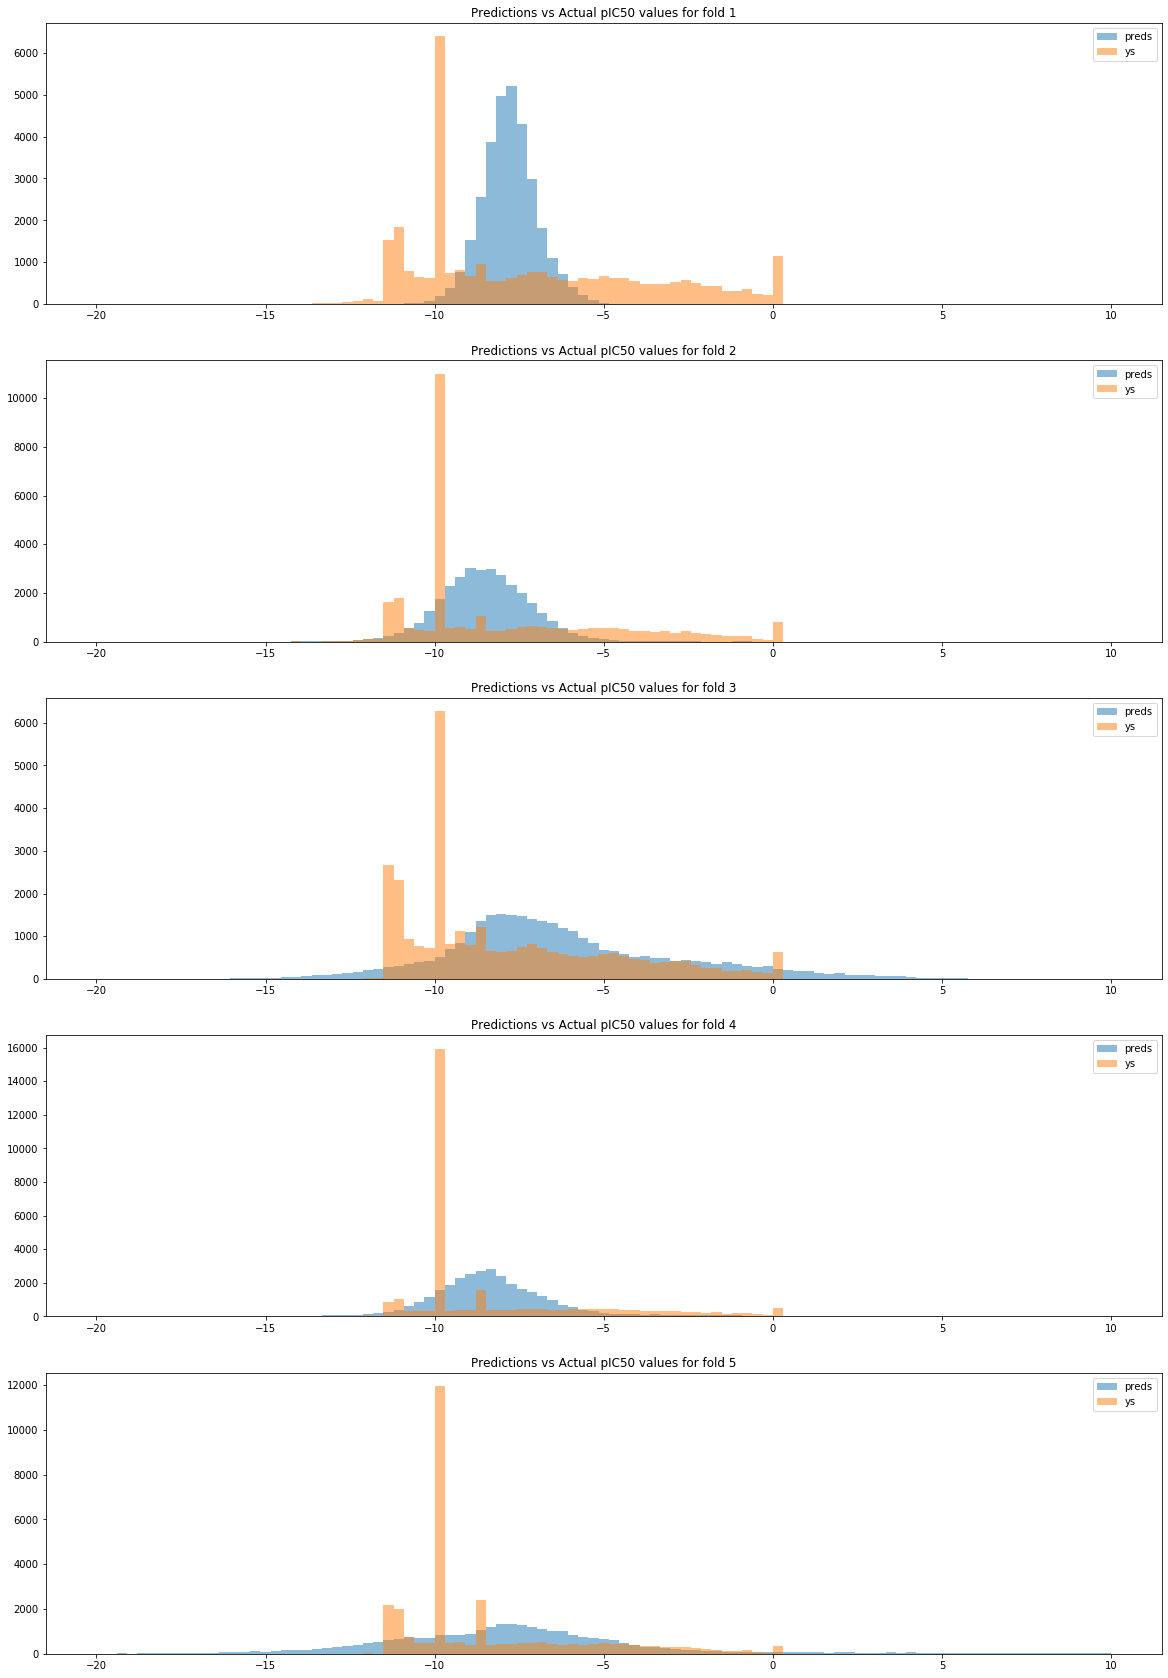

In [6]:
utils.plot_folds(ys, preds)

In [7]:
mean_accuracy = np.mean(accs)
mean_accuracy

18989.57985074982

In [17]:
np.random.choice(mhc[(mhc['pIC50'] < -1 * 2) & (mhc['pIC50'] > -1* 2 - .305555)].index, smallest).shape

(549,)

Things to try to make more gaussian...
+ randomly sample from dataset
+ ditch outliers + random sample
+ apply some func like sq rt